In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm 
import quantecon as qe 

from scipy import optimize 
from scipy.optimize import minimize, NonlinearConstraint


from IPython.display import display, Markdown
from sympy import symbols, diff, latex, Eq, solve, lambdify, Function, limit

from IPython.display import Markdown



### Exercise 1. Testing algorithms with the Rosenbrock function (30 points).

#### 1a) Define the Rosenbrock function for a general number of variables $N$.

In [2]:
def Rosenbrock_Fn(X): 
    y = 0
    for i in range(len(X)-1):  
        y += (X[i+1] - X[i]**2)**2 + (1 - X[i])**2
    return y


#### 1b) Testing the Brute-force algorithm for N = 3, 4, 5. How does computational time increase as the number of variables $N$ increases?

In [3]:
N = (3, 4, 5)
min_fn = []
results = []
times = []

for i in N:
    ranges_X = [(-2,2)]*i
    qe.tic()
    Results = optimize.brute(Rosenbrock_Fn, ranges_X)
    time = qe.toc()
    min_val = Rosenbrock_Fn(Results)
    times.append(time)
    min_fn.append(min_val)
    results.append((Results))

# Preparing Markdown output, formatting each element of Results for display
brute_force_table = "| N | Minimum f(x) | Solutions (X) | Computation Time (seconds) |\n"
brute_force_table += "|---|---------------|----------------|---------------------------|\n"
for idx, n in enumerate(N):
    sol_str = ', '.join(f"{v:.2f}" for v in results[idx])  # Format each element of the solution
    brute_force_table += f"| {n} | {min_fn[idx]:.2f} | [{sol_str}] | {times[idx]:.2f} |\n"

display(Markdown(brute_force_table))


TOC: Elapsed: 0:00:0.01
TOC: Elapsed: 0:00:0.24
TOC: Elapsed: 0:00:6.13


| N | Minimum f(x) | Solutions (X) | Computation Time (seconds) |
|---|---------------|----------------|---------------------------|
| 3 | 0.00 | [1.00, 1.00, 1.00] | 0.01 |
| 4 | 0.00 | [1.00, 1.00, 1.00, 1.00] | 0.25 |
| 5 | 0.00 | [1.00, 1.00, 1.00, 1.00, 1.00] | 6.14 |


The computational time increases substantially as $N$ increases (see table above). The computational time increased roughly $25$ times between each increment of $N$.

#### 1c) Minimize the Rosenbrock function for $30$ variables (**$N = 30$**). Use the BFGS, Nelder-Mead, and Powell methods.  Initial values are 0.

In [4]:
N = 30
x0 = np.zeros(N)
methods = ('BFGS', 'Nelder-Mead', 'Powell')
times_N_30 = []
results_N_30 = []
min_fn_N_30 = []

# Modify your optimization loop to use minimize and handle methods correctly
for method in methods:
    qe.tic()
    result = optimize.minimize(Rosenbrock_Fn, x0, method=method)
    time = qe.toc()
    min_val = result.fun
    times_N_30.append(time)
    min_fn_N_30.append(min_val)
    results_N_30.append(result.x)

# Function to calculate average deviation from 1
def avg_deviation_from_1(results):
    deviations = np.abs(1 - results)
    avg_deviations = np.mean(deviations)
    return avg_deviations

# Preparing Markdown output with solution summaries
methods_table = "| Method | Minimum f(x) | Avg Deviation from 1 | Solutions (Summary) | Computation Time (seconds) |\n"
methods_table += "|--------|--------------|----------------------|---------------------|----------------------------|\n"
for idx, method in enumerate(methods):
    avg_dev = avg_deviation_from_1(results_N_30[idx])
    # Summarize the solution vector for display
    solution_summary = ', '.join(f"{v:.2f}" for v in results_N_30[idx][:3]) + ", ..., " + ', '.join(f"{v:.2f}" for v in results_N_30[idx][-3:])
    methods_table += f"| {method} | {min_fn_N_30[idx]:.4f} | {avg_dev:.4f} | [{solution_summary}] | {times_N_30[idx]:.2f} |\n"

display(Markdown(methods_table))

TOC: Elapsed: 0:00:0.02
TOC: Elapsed: 0:00:0.12
TOC: Elapsed: 0:00:0.37


| Method | Minimum f(x) | Avg Deviation from 1 | Solutions (Summary) | Computation Time (seconds) |
|--------|--------------|----------------------|---------------------|----------------------------|
| BFGS | 0.0000 | 0.0000 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 0.03 |
| Nelder-Mead | 26.8803 | 0.9600 | [0.31, 0.35, 0.03, ..., -0.16, 0.12, -0.92] | 0.12 |
| Powell | 0.0000 | 0.0000 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 0.37 |


It seems that the Nelder-Mead is stuck in a local minimum, given its very large minimum $f(x)$ of $26.9$. Its average deviation from the global minimum is $0.96$, compared to $0$ for the other methods. This is probably because we did not deliver a very good initial guess, so the simplex approach remained in a local minimum. 

There are two solutions: limit the bounds of the simplex search closer to the global minimum and provide an initial guess that is closer to the glboal minimum. We understand that this is "cheating" in the sense that we know the global minimum of the Rosenbrock function, which is unlikely to be the case in most real-life applications. Nonetheless, this effort reflects the importance of well-reasoned guesses and bounds. 


In [5]:
## Changing the bounds and guesses for the nelder mead 

x0_nelder_mead = [0.75]*N
ranges_x_nelder_mead = [(-1.5,1.5)]*N

## Recalculating the Nelder-Mead 

qe.tic()
result_nelder_mead = optimize.minimize(Rosenbrock_Fn, x0_nelder_mead, 
                                       bounds=ranges_x_nelder_mead, method='nelder-mead')
time_nelder_mead = qe.toc()
min_val_nelder_mead = result_nelder_mead.fun
nelder_deviation_from_1 = np.abs(1 - result_nelder_mead.x).mean()
    
## Inserting the results into the table again

idx = methods.index('Nelder-Mead') 

results_N_30[idx] = result_nelder_mead.x
min_fn_N_30[idx] = min_val_nelder_mead
times_N_30[idx] = time_nelder_mead

methods_table = "| Method | Minimum f(x) | Avg Deviation from 1 | Solutions (Summary) | Computation Time (seconds) |\n"
methods_table += "|--------|--------------|----------------------|---------------------|----------------------------|\n"
for idx, method in enumerate(methods):
    avg_dev = avg_deviation_from_1(results_N_30[idx])
    # Summarize the solution vector for display
    solution_summary = ', '.join(f"{v:.2f}" for v in results_N_30[idx][:3]) + ", ..., " + ', '.join(f"{v:.2f}" for v in results_N_30[idx][-3:])
    methods_table += f"| {method} | {min_fn_N_30[idx]:.4f} | {avg_dev:.4f} | [{solution_summary}] | {times_N_30[idx]:.2f} |\n"

display(Markdown(methods_table))


TOC: Elapsed: 0:00:0.13


| Method | Minimum f(x) | Avg Deviation from 1 | Solutions (Summary) | Computation Time (seconds) |
|--------|--------------|----------------------|---------------------|----------------------------|
| BFGS | 0.0000 | 0.0000 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 0.03 |
| Nelder-Mead | 0.0000 | 0.0005 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 0.14 |
| Powell | 0.0000 | 0.0000 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 0.37 |


The change of bounds and initial guesses has substantially improved the Nelder-Mead estimation, yielding the correct minimum $f(x)$ and now its estimates only deviate by 0.0005 from 1 on average. 

**Without seriously helping the Nelder-Mead method, the BFGS performed the best because it yielded the same results as the Powell, but did so 12 times faster**. The Powell would be the second best because it did not get stuck in a local minimum, unlike the Nelder-Mead. 

After changing the guesses and bounds for the Nelder-Mead, it becomes the second best method, as it needs about half the time of the Powell method to get essentially the same results. However, in contexts where there is no tolerance for errors, one could still claim that BFGS > Powell > Nelder-Mead. 

#### 1d) Test for N = 100

In [6]:
N = 100
x0 = np.zeros(N)
methods = ('BFGS', 'Nelder-Mead', 'Powell')
times_N_100 = []
results_N_100 = []
min_fn_N_100 = []

# Modify your optimization loop to use minimize and handle methods correctly
for method in methods:
    qe.tic()
    result = optimize.minimize(Rosenbrock_Fn, x0, method=method)
    time = qe.toc()
    min_val = result.fun
    times_N_100.append(time)
    min_fn_N_100.append(min_val)
    results_N_100.append(result.x)

# Function to calculate average deviation from 1
def avg_deviation_from_1(results):
    deviations = np.abs(1 - results)
    avg_deviations = np.mean(deviations)
    return avg_deviations

# Preparing Markdown output with solution summaries
methods_table = "| Method | Minimum f(x) | Avg Deviation from 1 | Solutions (Summary) | Computation Time (seconds) |\n"
methods_table += "|--------|--------------|----------------------|---------------------|----------------------------|\n"
for idx, method in enumerate(methods):
    avg_dev = avg_deviation_from_1(results_N_100[idx])
    # Summarize the solution vector for display
    solution_summary = ', '.join(f"{v:.2f}" for v in results_N_100[idx][:3]) + ", ..., " + ', '.join(f"{v:.2f}" for v in results_N_100[idx][-3:])
    methods_table += f"| {method} | {min_fn_N_100[idx]:.4f} | {avg_dev:.4f} | [{solution_summary}] | {times_N_100[idx]:.2f} |\n"

display(Markdown(methods_table))

TOC: Elapsed: 0:00:0.56
TOC: Elapsed: 0:00:1.24
TOC: Elapsed: 0:00:2.35


| Method | Minimum f(x) | Avg Deviation from 1 | Solutions (Summary) | Computation Time (seconds) |
|--------|--------------|----------------------|---------------------|----------------------------|
| BFGS | 0.0000 | 0.0000 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 0.57 |
| Nelder-Mead | 97.7717 | 0.9962 | [0.06, 0.01, -0.02, ..., -0.06, 0.05, -0.88] | 1.24 |
| Powell | 0.0000 | 0.0000 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 2.35 |


As in the $N = 30$ case, the Nelder-Mead is stuck in a local minimum, likely for the same reasons. Without changing the bounds or initial guesses, the BFGS is clearly the best method because it yields the correct estimates and did so 4 times faster than the Powell. **This motivates our conclusion that BFGS > Powell >> Nelder-Mead.**

In [7]:
## Changing the bounds and guesses for the nelder mead 

x0_nelder_mead = [0.75]*N
ranges_x_nelder_mead = [(-1.5,1.5)]*N


## Computing the Nelder-Mead again

qe.tic()
result_nelder_mead = optimize.minimize(Rosenbrock_Fn, x0_nelder_mead, 
                                       bounds=ranges_x_nelder_mead, method='nelder-mead')
time_nelder_mead = qe.toc()
min_val_nelder_mead = result_nelder_mead.fun
nelder_deviation_from_1 = np.abs(1 - result_nelder_mead.x).mean()
    
## Inserting the results into the table

idx = methods.index('Nelder-Mead') 

results_N_100[idx] = result_nelder_mead.x
min_fn_N_100[idx] = min_val_nelder_mead
times_N_100[idx] = time_nelder_mead

methods_table = "| Method | Minimum f(x) | Avg Deviation from 1 | Solutions (Summary) | Computation Time (seconds) |\n"
methods_table += "|--------|--------------|----------------------|---------------------|----------------------------|\n"
for idx, method in enumerate(methods):
    avg_dev = avg_deviation_from_1(results_N_100[idx])
    # Summarize the solution vector for display
    solution_summary = ', '.join(f"{v:.2f}" for v in results_N_100[idx][:3]) + ", ..., " + ', '.join(f"{v:.2f}" for v in results_N_100[idx][-3:])
    methods_table += f"| {method} | {min_fn_N_100[idx]:.4f} | {avg_dev:.4f} | [{solution_summary}] | {times_N_100[idx]:.2f} |\n"

display(Markdown(methods_table))


TOC: Elapsed: 0:00:1.22


| Method | Minimum f(x) | Avg Deviation from 1 | Solutions (Summary) | Computation Time (seconds) |
|--------|--------------|----------------------|---------------------|----------------------------|
| BFGS | 0.0000 | 0.0000 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 0.57 |
| Nelder-Mead | 2.6877 | 0.1101 | [1.00, 0.95, 0.99, ..., 0.74, 0.45, -0.33] | 1.23 |
| Powell | 0.0000 | 0.0000 | [1.00, 1.00, 1.00, ..., 1.00, 1.00, 1.00] | 2.35 |


The Nelder-Mead estimate improves, but is still inadequate for many real-world applications. We observed that we would have to set the initial guess between 0.99 and 1 to get an estimate comparable to the other methods. We would then have to essentially know the global minimum, which is highly unrealistic in many cases. 

**For this reasons, even in this case, we maintain BFGS > Powell >> Nelder-Mead.**

#### 1e) Algorithms comparison: which algorithm does better as N gets large and why?

The BFGS outperformed the other algorithms as N got large.

The major advantage of the BFGS is its efficient in its use of second-order derivative information. As a Quasi-Newton method that relies on computing the Hessian, the second-order derivative is used to determine optimal step-size. The BFGS is distinctive in how it uses the gradient through directional line search to get a refined approximation of the inverse Hessian. This is much less computationally expensive that recalculating it at every step. Thus, it quickly navigates across the functional domains of function that have well-behaved derivatives, which is the case for the Rosenbrock. Overall, the BFGS, as N increases, can perform best if the gradient and Hessian exist and are easily computable. But, this does not mean that the function is robust to local traps, which can still occur if the parameter hyperspace near the global minimum is very flat with many local minima. 

On the other hand, the Nelder-Mead uses a simplex method to iteratively search for the minimum on the specified grid. Instead of using derivative information to find the minimum, it computes the centroid of all the corners of the simples and sues the reflection of the worst point around the centroid to evaluate if it should move to/from its direction. The first disadvantage vis-a-vis the BFGS is that it is more computationally expensive, especially as N gets very large. Second, if the parameter hyperspace in the vicinity of the global minimum is typically very flat with many local minima, it can get stuck in a local minimum. However, as it does not use derivative information, it can work better than the BFGS for fucntions that are not locally differentiable (unlike the Rosenbrock).

Finally, the BFGS can outperform the Powell because the Powell method's efficiency greatly varies on the algorithm used to minimize along the search vector. The Powell method computes conjugate directions by minimizing the function along search vectors to converge to the global minimum. This is quite computationally expensive, but can fare better if the function is not fully known across its domain or is not locally smooth.


Sources:

[1] https://machinelearningmastery.com/bfgs-optimization-in-python/
[2] https://en.wikipedia.org/wiki/Powell%27s_method
[3] https://en.wikipedia.org/wiki/Nelder%E2%80%93Mead_method
[4] https://scipy-lectures.org/advanced/mathematical_optimization/

### Exercise 2

#### 2a) Given that each firm maximizes its profits-taking given the other firm's output, find the FOC of each firm.

In [8]:
from IPython.display import display, Markdown
from sympy import symbols, diff, latex, Eq, init_printing


# Initialize pretty printing
init_printing(use_latex='mathjax')

# Define symbols
q1, q2, c1, c2, alpha = symbols('q1 q2 c1 c2 alpha')

# Define the inverse demand function
def inverse_demand(q, alpha):
    return q**(-alpha)

# Define the cost function C1
def C1(c1, q1):
    return 0.5 * c1 * q1**2

# Define the profit function for entity 1
def profits1(q1, q2, c1, alpha):
    return inverse_demand(q1 + q2, alpha) * q1 - C1(c1, q1)

# Define the cost function C2
def C2(c2, q2):
    return 0.5 * c2 * q2**2

# Define the profit function for entity 2
def profits2(q1, q2, c2, alpha):
    return inverse_demand(q1 + q2, alpha) * q2 - C2(c2, q2)


In [9]:
# Calculate the first derivative of profits1 with respect to q1
d_profit1_d_q1 = diff(profits1(q1, q2, c1, alpha), q1)

# Calculate the first derivative of profits2 with respect to q2
d_profit2_d_q2 = diff(profits2(q1, q2, c2, alpha), q2)

# Display the derivatives in Markdown LaTeX format
latex_d_profit1_d_q1 = latex(d_profit1_d_q1)
latex_d_profit2_d_q2 = latex(d_profit2_d_q2)

# Display in Markdown
display(Markdown(f'''FOC for firm 1: $$\\frac{{\partial\\pi_1}}{{\partial q_1}} = {latex_d_profit1_d_q1}$$'''))

display(Markdown(f"FOC for firm 2: $$\\frac{{\partial\\pi_2}}{{\partial q_2}} = {latex_d_profit2_d_q2}$$"))



FOC for firm 1: $$\frac{\partial\pi_1}{\partial q_1} = - \frac{\alpha q_{1} \left(q_{1} + q_{2}\right)^{- \alpha}}{q_{1} + q_{2}} - 1.0 c_{1} q_{1} + \left(q_{1} + q_{2}\right)^{- \alpha}$$

FOC for firm 2: $$\frac{\partial\pi_2}{\partial q_2} = - \frac{\alpha q_{2} \left(q_{1} + q_{2}\right)^{- \alpha}}{q_{1} + q_{2}} - 1.0 c_{2} q_{2} + \left(q_{1} + q_{2}\right)^{- \alpha}$$

#### 2b) Let $\alpha = 0.625, c_1 = 0.6, c_2 = 0.8$. Find the Cornout equilibrium ($q_1^*, q_2^*, p^*$). Provide an interpretation of the results.

In [10]:
# Define numerical versions of the FOCs for each firm
d_profit1_d_q1_num = lambdify((q1, q2, c1, c2, alpha), diff(profits1(q1, q2, c1, alpha), q1), 'numpy')
d_profit2_d_q2_num = lambdify((q1, q2, c1, c2, alpha), diff(profits2(q1, q2, c2, alpha), q2), 'numpy')

# Parameter values
alpha_val = 0.625
c1_val = 0.6
c2_val = 0.8

# System of equations to solve
def equations(vars):
    q1, q2 = vars
    eq1 = d_profit1_d_q1_num(q1, q2, c1_val, c2_val, alpha_val)
    eq2 = d_profit2_d_q2_num(q1, q2, c1_val, c2_val, alpha_val)
    return [eq1, eq2]

# Initial guesses for q1 and q2
initial_guesses = [1, 1]

# Solve for q1 and q2
q1_star, q2_star = optimize.fsolve(equations, initial_guesses)

# Calculate p* using the inverse demand function at equilibrium quantities
p_star = (q1_star + q2_star) ** (-alpha_val)

q1_star, q2_star, p_star

# Display the results
display(Markdown(f"""
### Cournot Duopoly Equilibrium Results

- **Equilibrium Quantity of Firm 1** (\$q_1^*\$): {q1_star:.2f}
- **Equilibrium Quantity of Firm 2** (\$q_2^*\$): {q2_star:.2f}
- **Equilibrium Price** (\$p^*\$): {p_star:.2f}
"""))





### Cournot Duopoly Equilibrium Results

- **Equilibrium Quantity of Firm 1** (\$q_1^*\$): 0.84
- **Equilibrium Quantity of Firm 2** (\$q_2^*\$): 0.69
- **Equilibrium Price** (\$p^*\$): 0.77


In a Cournot Duopoly, each firm sets its output quantities while anticipating the amount that its competitor chooses to produce. Given that firm $1$ has a lower cost of production than firm $2$ ($c_1 = 0.6$, $c_2 = 0.8$), we would expect this firm to produce a larger output, given that it can collect more profit from a larger output. We see that this is true in equilibrium - firm $1$ produces a higher output of $0.84$, compared to firm $2$'s output of $0.69$.

The inverse demand function determines the price of the goods depending on the quantity demanded. The alpha parameter therefore determines the elasticity of demand - the sensitivity of quantity demanded to changes in price. Our parameter value of $\alpha = 0.625$ indicates demand is inelastic. This potentially gives both firms enough market power to freely determine quantity with respect to price, increasing the equilibrium quantity demanded, while allowing price to remain relatively high.

#### 2c) The market is controlled by $N$ firms that compete with each other. They have the same inverse demand function as before, the same quadratic costs, and each firm maximizes its profit taking as given the other firm's output. Create a function that for $N > 1$ computes the set of $N$ FOCs that characterize the Cornout equilibrium quantities.

In [11]:
def cournot_focs(N, alpha, c):
    # Symbolic definitions
    q = symbols(f'q1:{N+1}')  # Generate quantities q1, q2, ..., qN
    Q = sum(q)  # Total quantity
    P = Q**(-alpha)  # Inverse demand function P(Q) = Q^(-alpha)
    
    focs = []
    for i in range(N):
        # Quadratic cost function for firm i
        Ci = 0.5 * c[i] * q[i]**2
        # Profit function for firm i
        profit_i = P * q[i] - Ci
        # First derivative of the profit function with respect to qi
        foc_i = diff(profit_i, q[i])
        focs.append(foc_i)
    
    # Function to evaluate FOCs numerically
    def eval_focs(q_vals):
        subs = {q[i]: q_vals[i] for i in range(N)}
        return [foc.evalf(subs=subs) for foc in focs]
    
    return eval_focs


#### 2d) i) Compute the equilibrium under 3 firms.

In [12]:
# Setting the parameters for the 3 firm market
c_vals = [0.6, 0.8, 0.5]
N = 3
alpha = 0.625

# Get the FOCs

eval_focs = cournot_focs(N, alpha_val, c_vals)

# Define a function compatible with fsolve [we had problems with just using fsolve]
def fsolve_focs(q_vals):
    return [float(f) for f in eval_focs(q_vals)]

# Initial guesses for q1, q2, q3
initial_guesses = np.array([1, 1, 1])

# Solve for q1, q2, and q3 using fsolve
q_star_3firms = optimize.fsolve(fsolve_focs, initial_guesses)

# Calculate p* using the inverse demand function at equilibrium quantities
p_star_3firms = sum(q_star_3firms) ** (-alpha_val)

display(Markdown(f'''The equilibrium quantities $(q_1 ^*, q_2 ^*, q_3 ^*)$ are
                ({q_star_3firms[0]:.2f}, {q_star_3firms[1]:.2f}, {q_star_3firms[2]:.2f})
                and equilibrium price $p^*$ is {p_star_3firms:.2f}.'''))




The equilibrium quantities $(q_1 ^*, q_2 ^*, q_3 ^*)$ are
                (0.78, 0.62, 0.90)
                and equilibrium price $p^*$ is 0.59.

#### 2d) ii) Compute the equilibrium under 6 firms

In [13]:
# Setting the parameters for the 3 firm market
c_vals = [0.6, 0.8, 0.5, 0.5, 0.4, 0.2]
N = 6
alpha = 0.625

# Get the FOCs

eval_focs = cournot_focs(N, alpha_val, c_vals)

# Define a function compatible with fsolve [we had problems with just using fsolve]
def fsolve_focs(q_vals):
    return [float(f) for f in eval_focs(q_vals)]

# Initial guesses for q1 to q6
initial_guesses = np.array([1, 1, 1, 1, 1, 1])

# Solve for q1 to q6 using fsolve
q_star_6firms = optimize.fsolve(fsolve_focs, initial_guesses)

# Calculate p* using the inverse demand function at equilibrium quantities
p_star_6firms = sum(q_star_6firms) ** (-alpha_val)

display(Markdown(f'''The equilibrium quantities $(q_1 ^*, q_2 ^*, q_3 ^*, q_4 ^*, q_5 ^*, q_6 ^*)$ are
                ({q_star_6firms[0]:.2f}, {q_star_6firms[1]:.2f}, {q_star_6firms[2]:.2f}, {q_star_6firms[3]:.2f},
                {q_star_6firms[4]:.2f}, {q_star_6firms[5]:.2f})
                and equilibrium price $p^*$ is {p_star_6firms:.2f}.'''))




The equilibrium quantities $(q_1 ^*, q_2 ^*, q_3 ^*, q_4 ^*, q_5 ^*, q_6 ^*)$ are
                (0.58, 0.44, 0.69, 0.69,
                0.84, 1.51)
                and equilibrium price $p^*$ is 0.38.

#### 2e) i) Calculate $(q_i^*, p^*)$ for $N = 10$. All firms have the same cost $c_i = 0.6$.

In [14]:
# Setting the parameters for the 10 firm market
N = 10
c_vals = [0.6]*N
alpha = 0.625

# Get the FOCs

eval_focs = cournot_focs(N, alpha_val, c_vals)

# Define a function compatible with fsolve [we had problems with just using fsolve]
def fsolve_focs(q_vals):
    return [float(f) for f in eval_focs(q_vals)]

# Initial guesses for q1 to q10
initial_guesses = [1]*N

# Solve for q1 to q6 using fsolve
q_star_10firms = optimize.fsolve(fsolve_focs, initial_guesses)

# Calculate p* using the inverse demand function at equilibrium quantities
p_star_10firms = sum(q_star_10firms) ** (-alpha_val)

display(Markdown(f'''The equilibrium quantities $(q_1 ^*, q_2 ^*, q_3 ^*, q_4 ^*, q_5 ^*,
                q_6 ^*, q_7^*, q_8^*, q_9^*, q_{{10}}^*)$ are
                ({q_star_10firms[0]:.2f}, {q_star_10firms[1]:.2f}, {q_star_10firms[2]:.2f}, {q_star_10firms[3]:.2f},
                {q_star_10firms[4]:.2f}, {q_star_10firms[5]:.2f}, {q_star_10firms[6]:.2f}, {q_star_10firms[7]:.2f},
                {q_star_10firms[8]:.2f}, {q_star_10firms[9]:.2f})
                and equilibrium price $p^*$ is {p_star_10firms:.2f}.'''))




The equilibrium quantities $(q_1 ^*, q_2 ^*, q_3 ^*, q_4 ^*, q_5 ^*,
                q_6 ^*, q_7^*, q_8^*, q_9^*, q_{10}^*)$ are
                (0.54, 0.54, 0.54, 0.54,
                0.54, 0.54, 0.54, 0.54,
                0.54, 0.54)
                and equilibrium price $p^*$ is 0.35.

#### 2e) ii) Calculate $(q_i^*, p^*)$ for $N = 15$. All firms have the same cost $c_i = 0.6$.

In [15]:
# Setting the parameters for the 10 firm market
N = 15
c_vals = [0.6]*N
alpha = 0.625

# Get the FOCs

eval_focs = cournot_focs(N, alpha_val, c_vals)

# Define a function compatible with fsolve [we had problems with just using fsolve]
def fsolve_focs(q_vals):
    return [float(f) for f in eval_focs(q_vals)]

# Initial guesses for q1 to q10
initial_guesses = [1]*N

# Solve for q1 to q6 using fsolve
q_star_15firms = optimize.fsolve(fsolve_focs, initial_guesses)

# Calculate p* using the inverse demand function at equilibrium quantities
p_star_15firms = sum(q_star_15firms) ** (-alpha_val)

display(Markdown(f'''The equilibrium quantities $(q_1 ^*, q_2 ^*, q_3 ^*, q_4 ^*, q_5 ^*,
                q_6 ^*, q_7^*, q_8^*, q_9^*, q_{{10}}^*, q_{{11}}^*, q_{{12}}^*, q_{{13}}^*,
                q_{{14}}^*, q_{{15}}^*)$ are
                ({q_star_15firms[0]:.2f}, {q_star_15firms[1]:.2f}, {q_star_15firms[2]:.2f}, {q_star_15firms[3]:.2f},
                {q_star_15firms[4]:.2f}, {q_star_15firms[5]:.2f}, {q_star_15firms[6]:.2f}, {q_star_15firms[7]:.2f},
                {q_star_15firms[8]:.2f}, {q_star_15firms[9]:.2f}, {q_star_15firms[10]:.2f}, {q_star_15firms[11]:.2f},
                {q_star_15firms[12]:.2f}, {q_star_15firms[13]:.2f}, {q_star_15firms[14]:.2f})
                and equilibrium price $p^*$ is {p_star_15firms:.2f}.'''))




The equilibrium quantities $(q_1 ^*, q_2 ^*, q_3 ^*, q_4 ^*, q_5 ^*,
                q_6 ^*, q_7^*, q_8^*, q_9^*, q_{10}^*, q_{11}^*, q_{12}^*, q_{13}^*,
                q_{14}^*, q_{15}^*)$ are
                (0.47, 0.47, 0.47, 0.47,
                0.47, 0.47, 0.47, 0.47,
                0.47, 0.47, 0.47, 0.47,
                0.47, 0.47, 0.47)
                and equilibrium price $p^*$ is 0.29.

#### 2f) Plot the prices for N = 2, 3, 6, 10, 15. Interpret the results.

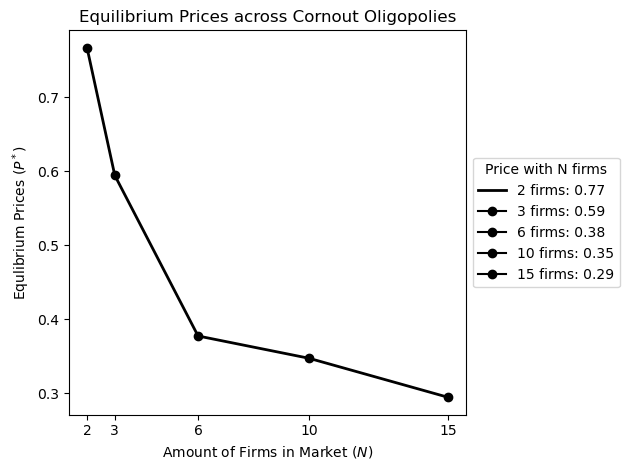

In [16]:
N = [2, 3, 6, 10, 15]
equilibrium_prices = [p_star, p_star_3firms, p_star_6firms,  p_star_10firms,  p_star_15firms] 

fig, ax = plt.subplots()
ax.plot(N, equilibrium_prices, linewidth = 2, color = 'black')
ax.set_ylabel(r"Equlibrium Prices ($P^*$)")
ax.set_xlabel(r"Amount of Firms in Market ($N$)")
plt.title(r"Equilibrium Prices across Cornout Oligopolies")
plt.xticks(N)

# Plotting the legend

legend_labels = [f'{n} firms: {price:.2f}' for n, price in zip(N, equilibrium_prices)]

for i, price in zip(N, equilibrium_prices):
    ax.plot(i, price, marker='o', color='black') 

ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title = "Price with N firms")

plt.tight_layout()  

plt.show()




**The equilibrium price declines as the amount of firms in the market increases.**

For simplicity, let us assume that all firms face the same cost ($c_n$) in the cost function $C_n$. Using this simplifying assumption, we can then show that as $N$ increases, the equilibrium prices falls.

In a Cournot oligopoly model with $N$ firms, the first-order conditions (FOCs) for profit maximization for firm $i$ with respect to its quantity $q_i$ is given by setting the derivative of the profit function with respect to $q_i$ to zero:

$$\frac{\partial \pi_i}{\partial q_i} = -\alpha Q^{-\alpha - 1} q_i + Q^{-\alpha} - c q_i = 0$$

Assuming symmetry among firms, where $q_i = q$ for all $i$, and hence $Q = N \cdot q$, we substitute $Q$ with $N \cdot q$ in the FOCs:

$$-\alpha (N \cdot q)^{-\alpha - 1} \cdot q + (N \cdot q)^{-\alpha} - c \cdot q = 0$$

Solving for $q$, the quantity produced by each firm, we find (see code below):

$$q = \left(\frac{N^{-\alpha - 1}(N - \alpha)}{c}\right)^{\frac{1}{\alpha + 1}}$$

The total quantity $Q$ produced by all $N$ firms is then:

$$Q = N \cdot q = N \cdot \left(\frac{N^{-\alpha - 1}(N - \alpha)}{c}\right)^{\frac{1}{\alpha + 1}}$$

The market price $P$ can be found by substituting $Q$ into the inverse demand function:

$$P(Q) = Q^{-\alpha}$$

Thus, the equilibrium price in the market is:

$$P = \left(N \cdot \left(\frac{N^{-\alpha - 1}(N - \alpha)}{c}\right)^{\frac{1}{\alpha + 1}}\right)^{-\alpha}$$

Rewriting, we get:

$$P = \frac{1}{\left(N \cdot \left(\frac{N^{-\alpha - 1}(N - \alpha)}{c}\right)^{\frac{1}{\alpha + 1}}\right)^{\alpha}}$$

Clearly, as $N$ increases, the equilibrium price declines, assuming $\alpha > 0$.

If we relax our assumption of identical costs, we can still see that as $N$ rises, price falls, ceteris paribus.

In fact, as $N \rightarrow \infty$, $P \rightarrow 0$ since $P = \frac{1}{\infty} = 0$ for $\alpha > 0$.


In [17]:
## Code that solved for q

# Define the symbols
q, Q, alpha, c, N = symbols('q Q alpha c N', real=True, positive=True)

# Given the derivative of the profit function, set it to zero for FOC
foc_eq = Eq(-alpha * Q**(-alpha - 1) * q + Q**(-alpha) - c * q, 0)

# Substitute Q with N*q
foc_eq_sub = foc_eq.subs(Q, N*q)

# Solve the equation for q
solution_q = solve(foc_eq_sub, q)

solution_q


⎡                   1  ⎤
⎢                 ─────⎥
⎢                 α + 1⎥
⎢⎛ -α - 1        ⎞     ⎥
⎢⎜N      ⋅(N - α)⎟     ⎥
⎢⎜───────────────⎟     ⎥
⎣⎝       c       ⎠     ⎦

### Exercise 3: Optimal life-cycle consumption paths

#### 3a) Two-period model. Find pptimal consumption that solve the problem and plot the life-cycle of income and optimal consumption.

In [18]:
# Defining the utility function and the objective function that will be minimized
def utility(c, theta):
    return c**(1-theta) / (1 - theta)

def objective(X, *args):
    y0, y1, params = args # vars + params 
    a0, beta, theta, r = params # params
    c0, c1, a1 = X # what we are solving for 
    return -(utility(c0, theta) + beta * utility(c1, theta)) # obj eq

# Defining the constraints 
def constraint_c0(X):
    c0, _, a1 = X # unpacking only c0 and a1
    return c0 + a1 - (a0 + y0)

def constraint_c1(X):
    _, c1, a1 = X # unpacking only c1 and a1
    return c1 - ((1 + r) * a1 + y1)

# Defining constraints in a format recognized by scipy.optimize
cons = [{'type': 'eq', 'fun': constraint_c0},
        {'type': 'eq', 'fun': constraint_c1}]

# Defining Parameters and variables 
y0, y1, a0 = 10, 5, 0  
beta = 0.96
theta = 1.5
r = (1/beta) - 1
params = [a0, beta, theta, r]

# Initial guess
x0 = np.array([1, 1, 1])

# Performing minimization
result_minimization = minimize(objective, x0, args=(y0, y1, params), constraints=cons)

# Extracting optimal values
c0_optimal_3a, c1_optimal_3a, a1_optimal = result_minimization.x
display(Markdown((f"Optimal $C_0$: {c0_optimal_3a:.2f}")))
display(Markdown((f"Optimal $C_1$: {c1_optimal_3a:.2f}")))
display(Markdown((f"Optimal $a_1$: {a1_optimal:.2f}")))


Optimal $C_0$: 7.55

Optimal $C_1$: 7.55

Optimal $a_1$: 2.45

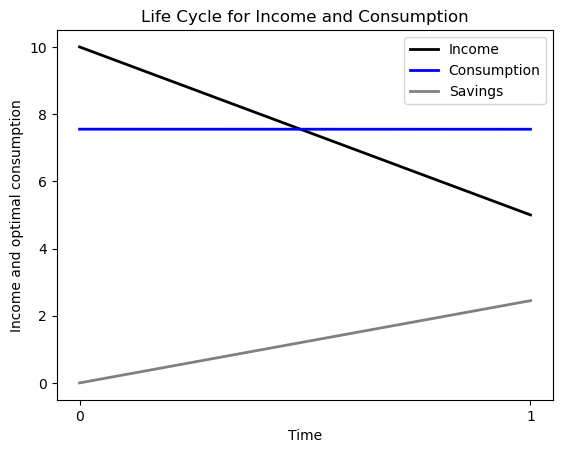

In [19]:
## Plotting the lifecycles 

t = [0,1]
y = [y0, y1]
c_3a = [c0_optimal_3a, c1_optimal_3a]
a = [a0, a1_optimal]

fig, ax = plt.subplots()
ax.plot(t, y, linewidth = 2, color = "black")
ax.plot(t, c_3a, linewidth = 2, color = "blue")
ax.plot(t, a, linewidth = 2, color = "grey")
ax.legend(['Income', 'Consumption', 'Savings'])  
ax.set_ylabel(r"Income and optimal consumption")
ax.set_xlabel(r"Time")
plt.title(r"Life Cycle for Income and Consumption")
plt.xticks(t)
plt.show()


Given that optimal consumption in both periods is 7.55, consumption is smoothed. This occurs because we have a convex utility function due to our relative risk aversion paramtere of $\theta = 1.5$. In period 0, the agent consumes 7.55, derring 2.45 to savings in period 1. The agent sacrifices consumption in period 0 for the interest gained in period 1 as they are very slightly impatient ($\beta = 0.96$).

#### 3b) Model with 4 periods

In [20]:
# Define utility function
def utility(c, theta):
    return (c**(1 - theta))/(1 - theta)

# Define objective function
def objective(x, *args):
    y, params = args
    c0, c1, c2, c3, a1, a2, a3 = x
    beta, theta = params['beta'], params['theta']
    return -(utility(c0, theta) + beta*utility(c1, theta) + beta**2*utility(c2, theta) + beta**3*utility(c3, theta))

# Define budget constraints
def constraints(x, *args):
    y, params = args
    c0, c1, c2, c3, a1, a2, a3 = x
    a0, r = params['a0'], params['r']
    eq1 = c0 + a1 - a0 - y[0]
    eq2 = c1 + a2 - (1+r)*a1 - y[1]
    eq3 = c2 + a3 - (1+r)*a2 - y[2]
    eq4 = c3 - (1+r)*a3 - y[3]
    return [eq1, eq2, eq3, eq4]

# Parameters and initial values
params = {
    'a0': 0,
    'beta': 0.96,
    'theta': 1.5,
    'r': 1/0.96 - 1,
}

y = [5, 10, 15, 0]
x0 = [1, 1, 1, 1, 1, 1, 1]

# Specifying the minimizer constraint type
budget_constraint = {'type': 'eq', 'fun': constraints, 'args': (y, params)}

# Solving the optimization problem
result_min = minimize(objective, x0, args=(y, params), constraints=budget_constraint, method='SLSQP')

c0_optimal, c1_optimal, c2_optimal, c3_optimal, a1_optimal, a2_optimal, a3_optimal = result_min.x

display(Markdown((f"Optimal $C_0$: {c0_optimal:.2f}")))
display(Markdown((f"Optimal $C_1$: {c1_optimal:.2f}")))
display(Markdown((f"Optimal $C_2$: {c2_optimal:.2f}")))
display(Markdown((f"Optimal $C_3$: {c3_optimal:.2f}")))
display(Markdown((f"Optimal $A_1$: {a1_optimal:.2f}")))
display(Markdown((f"Optimal $A_2$: {a2_optimal:.2f}")))
display(Markdown((f"Optimal $A_3$: {a3_optimal:.2f}")))


Optimal $C_0$: 7.49

Optimal $C_1$: 7.53

Optimal $C_2$: 7.58

Optimal $C_3$: 7.60

Optimal $A_1$: -2.49

Optimal $A_2$: -0.12

Optimal $A_3$: 7.29

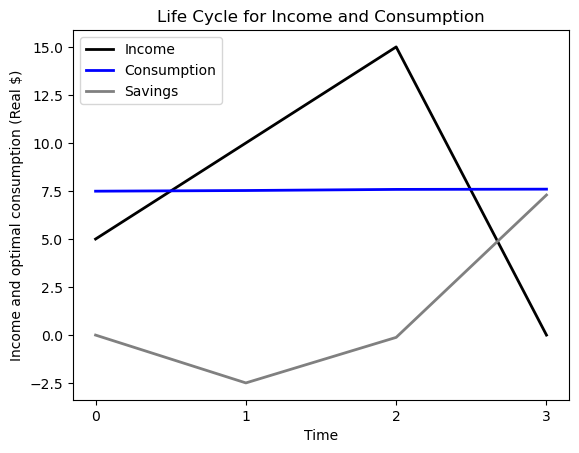

In [21]:
## Plotting the lifecycles 

t = [0,1, 2, 3]
c = [c0_optimal, c1_optimal, c2_optimal, c3_optimal]
a = [a0, a1_optimal, a2_optimal, a3_optimal]

fig, ax = plt.subplots()
ax.plot(t, y, linewidth = 2, color = "black")
ax.plot(t, c, linewidth = 2, color = "blue")
ax.plot(t, a, linewidth = 2, color = "grey")
ax.legend(['Income', 'Consumption', 'Savings'])  
ax.set_ylabel(r"Income and optimal consumption (Real $)")
ax.set_xlabel(r"Time")
plt.title(r"Life Cycle for Income and Consumption")
plt.xticks(t)
plt.show()


Again, the agent is able achieve relatively smooth consumption across the four periods (all $\approx 7.5$). But to do so, they take on debt in period 1 (i.e. savings go negative). We are interested to see what would happen if we prevented borrowing and how it would impact consumption smoothing, so we simulate this below.

In [22]:
def budget_constraint(x, *args):
    y, params = args
    c0, c1, c2, c3, a1, a2, a3 = x
    a0, r = params['a0'], params['r']
    eq1 = c0 + a1 - a0 - y[0]
    eq2 = c1 + a2 - (1+r) * a1 - y[1]
    eq3 = c2 + a3 - (1+r) * a2 - y[2]
    eq4 = c3 - (1+r) * a3 - y[3]
    return [eq1, eq2, eq3, eq4]

def borrowing_constraint(x, *args):
    return [x[4], x[5], x[6]] 

# Constraint definitions
budget_constraints = {'type': 'eq', 'fun': budget_constraint, 'args': (y, params)}
borrowing_constraints = {'type': 'ineq', 'fun': borrowing_constraint, 'args': (y, params)}
borrowing_budget_constraints = [budget_constraints, borrowing_constraints]

# Execute the optimization with defined constraints
result_borrowing_constraints = minimize(objective, x0, args=(y, params), constraints=borrowing_budget_constraints)

# Extract the results
c0_optimal, c1_optimal, c2_optimal, c3_optimal, a1_optimal, a2_optimal, a3_optimal = result_borrowing_constraints.x

# Display the results using Markdown
display(Markdown(f"Optimal $C_0$: {c0_optimal:.2f}"))
display(Markdown(f"Optimal $C_1$: {c1_optimal:.2f}"))
display(Markdown(f"Optimal $C_2$: {c2_optimal:.2f}"))
display(Markdown(f"Optimal $C_3$: {c3_optimal:.2f}"))

Optimal $C_0$: 5.00

Optimal $C_1$: 8.46

Optimal $C_2$: 8.47

Optimal $C_3$: 8.47

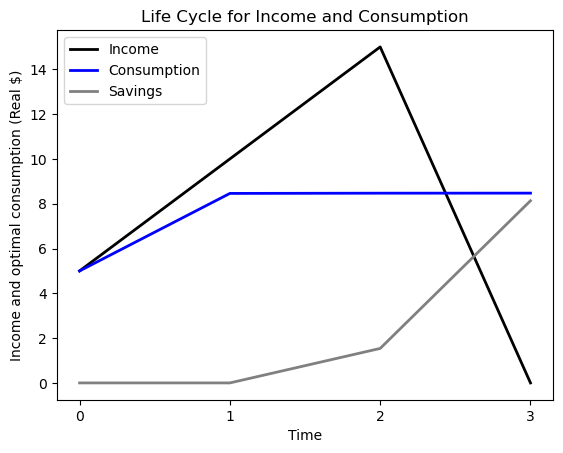

In [23]:
## Plotting the lifecycles 

t = [0,1, 2, 3]
c = [c0_optimal, c1_optimal, c2_optimal, c3_optimal]
a = [a0, a1_optimal, a2_optimal, a3_optimal]

fig, ax = plt.subplots()
ax.plot(t, y, linewidth = 2, color = "black")
ax.plot(t, c, linewidth = 2, color = "blue")
ax.plot(t, a, linewidth = 2, color = "grey")
ax.legend(['Income', 'Consumption', 'Savings'])  
ax.set_ylabel(fr"Income and optimal consumption (Real $)")
ax.set_xlabel(r"Time")
plt.title(r"Life Cycle for Income and Consumption")
plt.xticks(t)
plt.show()


Imposing the liquidity constraint means that the agent consumes less than they would prefer given their relative risk-aversion and impatience. As a result, they have higher consumption in the future periods when they are no longer / less liquidity-constrained with incoming / rising income.

#### 3c) Comparative Statics: case 1 (r = 0.01), case 2 (r = 0.04), case 3 (r = 0.08)

In [24]:
a0 = 0
beta = 0.96
theta = 1.5
x0 = [1,1,1,1,1,1,1]
r_values = [0.01, 0.04, 0.08]  # Renamed to r_values to avoid confusion with r inside the loop
optimal_consumptions = []

for r in r_values:
    params = {'a0': a0, 'beta': beta, 'theta': theta, 'r': r}  # Now a dictionary
    # Define constraints for each rate
    budget_constraint_3c = {'type': 'eq', 'fun': budget_constraint, 'args': (y, params)}

    # Run the optimization
    result_3c = minimize(objective, x0, args=(y, params), constraints=[budget_constraint_3c], method='SLSQP')
    
    # Extract and store the optimal consumption values
    optimal_consumptions.append(result_3c.x[:4])

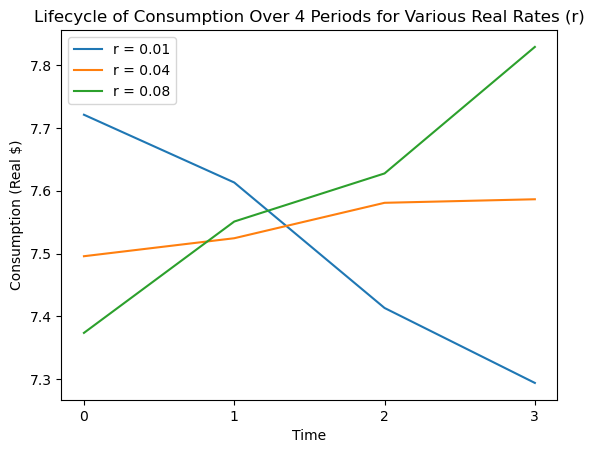

In [25]:
r = r_values

# Time periods
t_periods = np.arange(4)

fig, ax = plt.subplots()

for i in range(len(r)):
    ax.plot(t_periods, optimal_consumptions[i], label=f"r = {r[i]}")

ax.legend()
ax.set_xlabel("Time")
plt.xticks(t)
ax.set_ylabel("Consumption (Real $)")
ax.set_title("Lifecycle of Consumption Over 4 Periods for Various Real Rates (r)")
plt.show()


As the real rate of interest rises, the slope and magnitude of the lifecycle of consumption rises. This is ebcause risk-averse agents have a greater incentive to save early on and consume more (i.e. their interest-accumulating savings) in later periods. 

#### 3d) Model from 3a after inducing uncertainty over income realization.

In [26]:
####################################################################################
##### Defining the functions, utility is kept the same from previous questions #####
####################################################################################

def utility(c, theta):
    return (c**(1 - theta))/(1 - theta)

def consumption(y, a1, r):
    return (1+r)*a1 + y

# Define objective function
def objective_function(X, Y, params):
    c0, c1, a1 = X
    y0, y1_low, y1_high = Y
    a0, beta, theta, r, prob_low, prob_high = params 
    return -(utility(c0, theta) + beta*(prob_low*utility(consumption(y1_low, a1, r), theta) + prob_high*utility(consumption(y1_high, a1, r), theta)))

#########################
##### Parametrizing #####
#########################

x0 = [1,1,1]    
a0 = 0
beta = 0.96
theta = 1.5
r = 1/beta - 1

# Set income
y1_low = 2.5
y1_high = 7.5
Y = [10, 2.5, 7.5]

# Set probabilities 
prob_low = 0.5
prob_high = 0.5

params = [a0, beta, theta, r, prob_low, prob_high]


####################################################################
##### Setting constraints and solving based on income scenario #####
####################################################################

optimal_consumption = []
assets = []  
result = []
realized_y = [2.5,7.5]

for i in realized_y:
    
    # Setting and specifying the BC
    
    def budget_constraint(X, Y, params): 
        c0, c1, a1 = X
        y0, y1_low, y1_high = Y    
        a0, beta, theta, r, prob_low, prob_high = params 
        eq1 = c0 + a1 - a0 - y0
        eq2 = c1 - (1+r)*a1 - i
        return [eq1,eq2]
        cons = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}
        
    cons = {'type': 'eq', 'fun': budget_constraint, 'args': (Y, params)}

    # Solving the problem
    result_i = minimize(objective_function, x0, args=(Y,params), constraints = cons)
    
    # Storing the results
    result.append(result_i.x)
    optimal_consumption.append(result_i.x[:2])
    assets.append(np.insert(result_i.x[2:],a0,0))

display(Markdown(f"The Low income lifecycle: {[f'{x:.2f}' for x in result[0]]}"))
display(Markdown(f"The High income lifecycle: {[f'{x:.2f}' for x in result[1]]}"))


The Low income lifecycle: ['7.09', '5.54', '2.91']

The High income lifecycle: ['7.09', '10.53', '2.91']

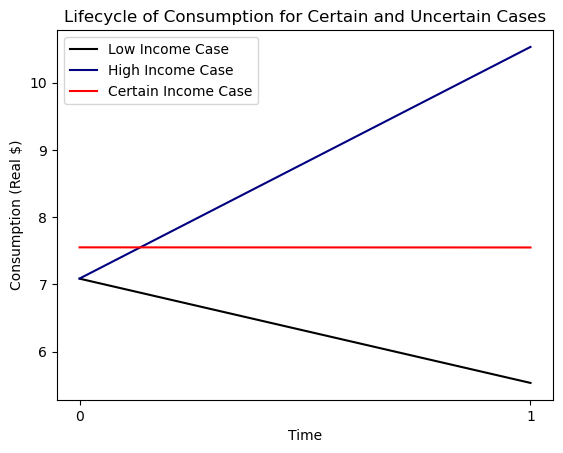

In [27]:
# Comparing the consumption life cyclces

t_periods = np.arange(2)

fig, ax = plt.subplots()
ax.plot(t_periods, optimal_consumption[0], "black", label="Low Income Case")
ax.plot(t_periods, optimal_consumption[1], "navy", label="High Income Case ")
ax.plot(t_periods, c_3a, "r", label = "Certain Income Case")
ax.legend()  
ax.set_xlabel(r"Time")  
ax.set_ylabel("Consumption (Real $)")  
ax.set_title("Lifecycle of Consumption for Certain and Uncertain Cases")
plt.xticks(t_periods)
plt.show()    



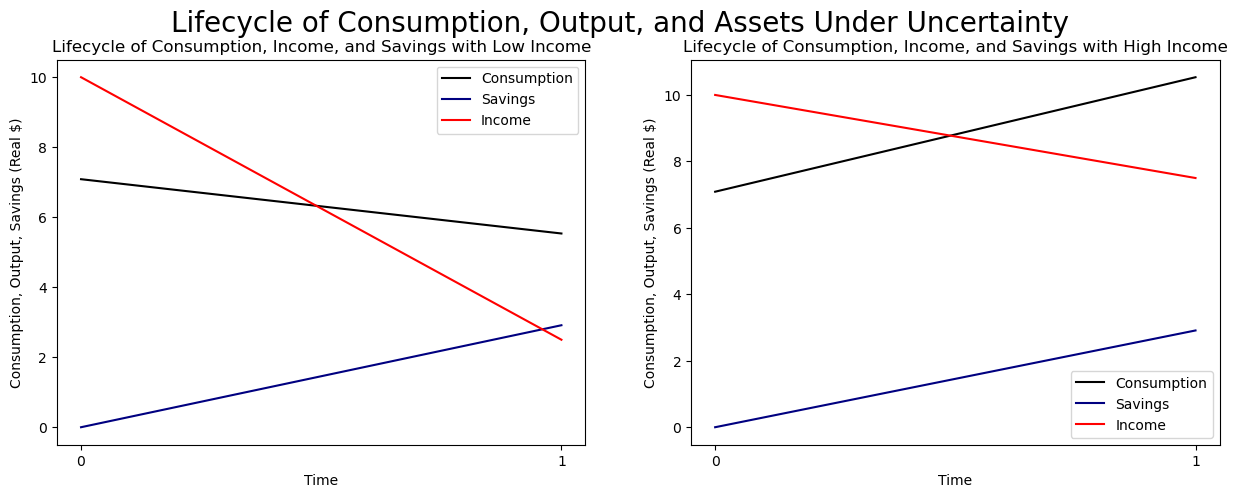

In [28]:
## Comparing the full income, consumption and savings cycles between low and high income 

domains_and_ranges = [[10, 2.5],[10, 7.5]]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i in range(2):
    ax[i].plot(t_periods, optimal_consumption[i], "black", label="Consumption")
    ax[i].plot(t_periods, assets[i], "navy", label="Savings" )
    ax[i].plot(t_periods, domains_and_ranges[i], "r", label="Income")
    ax[i].legend()  
    ax[i].set_xlabel(r"Time")  
    ax[i].set_ylabel("Consumption, Output, Savings (Real $)")  
    ax[i].set_xticks([0, 1])
ax[0].set_title("Lifecycle of Consumption, Income, and Savings with Low Income")
ax[1].set_title("Lifecycle of Consumption, Income, and Savings with High Income")
fig.suptitle("Lifecycle of Consumption, Output, and Assets Under Uncertainty", fontsize=20)
plt.show()

#### 3e) Compare the savings in a world with certainty and uncertainty. Why do savings increase as there is income risk? Provide an economic or real life intuition.

In both cases, the agent wants to smooth consumption as much as possible due to the diminishing marginal utility of wealth, reflecting their risk aversion. When given certainty over income realization, they are able to smooth their consumption to 7.55 per period. However, in the uncertain case, the agent puts excessive emphasis on low values of consumption, which results in greater savings (i.e. 2.91 in uncertainty but 2.45 in certainty). In other words, inducing uncertainty results in the agent deciding to elevate savings to protect against the risk of the low income case realizing.   

The economic or real life intuition is that the people that tend to be more risk-averse weigh more heavily more negative outcomes. For instance, Boutseka and Regaieg (2020) find that risk-averse investors choose strategies that insure them against the worst-possible exogenous shock (e.g. a very conservative stop-loss or choosing a stable, fixed-income portfolio), while over-confident investors seek little to no insurance. 

https://www.emerald.com/insight/content/doi/10.1108/JEFAS-07-2017-0081/full/html